<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Расчет-эффективности-обогащения-&quot;чернового-концентрата&quot;" data-toc-modified-id="Расчет-эффективности-обогащения-&quot;чернового-концентрата&quot;-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Расчет эффективности обогащения "чернового концентрата"</a></span></li><li><span><a href="#Анализ-недоступных-признаков-для-тестовой-выборки" data-toc-modified-id="Анализ-недоступных-признаков-для-тестовой-выборки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ недоступных признаков для тестовой выборки</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменения-концентрации-металлов--(Au,-Ag,-Pb)-на-каждом-этапе-очистки" data-toc-modified-id="Изменения-концентрации-металлов--(Au,-Ag,-Pb)-на-каждом-этапе-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменения концентрации металлов  (Au, Ag, Pb) на каждом этапе очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-в-обучающей-и-тестовой-выборке" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-в-обучающей-и-тестовой-выборке-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья в обучающей и тестовой выборке</a></span></li><li><span><a href="#Cуммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Cуммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cуммарная концентрация всех веществ на разных стадиях</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-sMAPE" data-toc-modified-id="Функция-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция <code>sMAPE</code></a></span></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-логистической-регрессии" data-toc-modified-id="Модель-логистической-регрессии-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель логистической регрессии</a></span></li><li><span><a href="#Модель-градиентного-спуска" data-toc-modified-id="Модель-градиентного-спуска-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель градиентного спуска</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Проверка-модели-на-тестовых-данных" data-toc-modified-id="Проверка-модели-на-тестовых-данных-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Проверка модели на тестовых данных</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

## Подготовка данных

In [1]:
import pandas as pd
import math as mt
import numpy as np
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score, 
                                     GridSearchCV)
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (mean_squared_error, 
                             mean_absolute_error, 
                             mean_absolute_percentage_error)
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

def data_view(data):
    
    """
    Функция вызвращает данные о таблице
    """
    return display(data.head(), 
                   data.info(), 
                   data.describe(), 
                   data.isna().sum())

In [2]:
train = pd.read_csv('gold_recovery_train_new.csv')
test = pd.read_csv('gold_recovery_test_new.csv')
full = pd.read_csv('gold_recovery_full_new.csv')

In [3]:
for df, name in zip([train, test, full], 
                    ['TRAIN', 'TEST', 'FULL']):
    print(name)
    data_view(df)
    print()
    print()
    

TRAIN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  fl

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64



TEST
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  prima

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb



FULL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  f

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [4]:
train.loc[:, 'rougher.output.tail_ag':'rougher.output.tail_au'].head()

,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au
0,5.008018,0.508728,19.154297,1.170244
1,4.955378,0.536689,18.965234,1.184827
2,4.843460,0.546416,18.808533,1.162562
3,4.655288,0.542525,19.330200,1.079755
4,4.552800,0.515438,19.267422,1.012642


In [5]:
train.loc[:, 'rougher.output.concentrate_ag':'rougher.output.recovery'].head()

,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery
0,11.500771,7.101074,28.029297,19.793808,87.107763
1,11.615865,7.278807,28.067063,20.050975,86.843261
2,11.695753,7.216833,27.454037,19.737170,86.842308
3,11.915047,7.175616,27.341277,19.320810,87.226430
4,12.411054,7.240205,27.041023,19.216101,86.688794


In [6]:
train.loc[:, 'rougher.input.feed_ag':'rougher.input.feed_au'].head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au
0,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150
1,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583
2,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222
3,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189
4,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707


### Расчет эффективности обогащения "чернового концентрата"

In [7]:
c_rougher =  train['rougher.output.concentrate_au']
f_rougher = train['rougher.input.feed_au']
t_rougher = train['rougher.output.tail_au']

rougher_recovery_train_calc = (
    (c_rougher * (f_rougher - t_rougher)) / (f_rougher * (c_rougher - t_rougher)) * 100
)
(rougher_recovery_train_calc - train['rougher.output.recovery']).mean()

-1.3885438295121047e-16

- Средние отклонение значений эффективности обогащения "чернового концентрата" по исходным данными и формуле практически нулевые.

### Анализ недоступных признаков для тестовой выборки

- В тестовой выборке недоступны 

In [8]:
set.difference(set(train.columns), set(test.columns))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

- Недоступны выходные параметры для каждого этапа обработки.

- Ожидаемые типы данных для этих параметров такие же как в полном датасете.

### Предобработка данных

- Замена индексов на столбец `date` и удаление его для всех таблиц

In [9]:
for df in [train, test, full]:
    df.index = df['date'].values
    df = df.pop('date')

- Заполнение пропусков в обучающем `train` и тестовом `test` наборе данных, исходя из того, что cоседние по времени параметры часто похожи

In [10]:
full = full.fillna(method='ffill')

- Недостающие данные для тестовой выборки добавим из полного датасета `full` по индексам-датам, также обновим обучающую выборку после заполнения пропусков

In [11]:
test = full.loc[test.index].drop(['rougher.output.recovery', 
                                  'final.output.recovery', 
                                  'rougher.calculation.au_pb_ratio', 
                                  'rougher.calculation.floatbank10_sulfate_to_au_feed', 
                                  'rougher.calculation.floatbank11_sulfate_to_au_feed', 
                                  'rougher.calculation.sulfate_to_au_concentrate',], axis=1)
train = full.loc[train.index]

### Вывод

<b>
    
- Средние отклонение значений эффективности обогащения "чернового концентрата" по исходным данными и формуле практически нулевые.

    
- В качестве индексов для все таблиц были установлены даты.
    
- Заполнение пропусков было осуществлено методом `ffill`, исходя из того, что cоседние по времени параметры часто похожи.
    
</b>

## Анализ данных

### Изменения концентрации металлов  (Au, Ag, Pb) на каждом этапе очистки

In [12]:
raw_materials = []
rougher_step = []
primary_cleaner_step = []
final = []

for element in ['_au', '_ag', '_pb', '_sol']:
    raw_materials.append(
        full['rougher.input.feed' + element].median()
    )
    rougher_step.append(
        full['rougher.output.concentrate' + element].median()
    )
    primary_cleaner_step.append(
        full['primary_cleaner.output.concentrate' + element].median()
    )
    final.append(
        full['final.output.concentrate' + element].median()
    )

In [13]:
concentration_table = pd.DataFrame([
    raw_materials, 
    rougher_step, 
    primary_cleaner_step, 
    final
],
    columns=['_au', '_ag', '_pb', '_sol'],
    index=['сырье', 'черновой концентрат', '1-я стадия', 'финальный концентрат']
)
concentration_table

,_au,_ag,_pb,_sol
сырье,8.125839,8.593574,3.528235,37.189485
черновой концентрат,20.280214,12.098115,7.742580,29.833638
1-я стадия,32.841295,8.507298,10.142270,10.238614
финальный концентрат,45.011244,5.066039,10.102264,9.184826


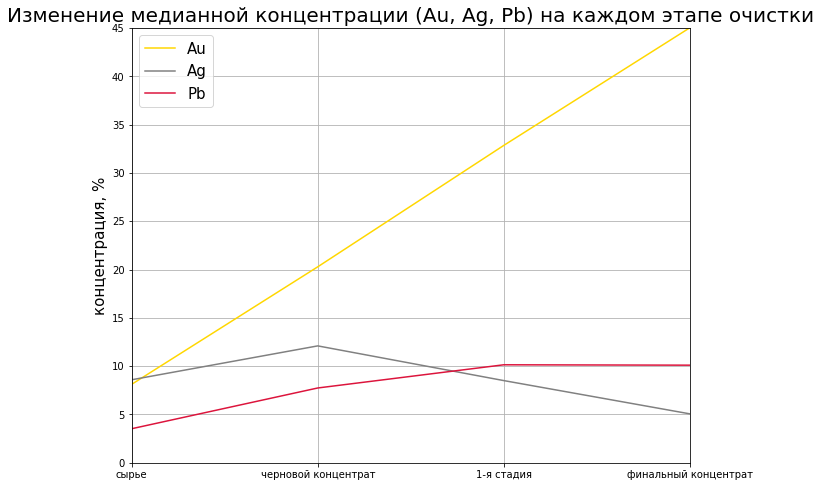

In [14]:
fig, ax = plt.subplots()

ax.plot(concentration_table.index, concentration_table['_au'],
        linestyle = '-',
        color = 'gold', 
        label='Au')
ax.plot(concentration_table.index, concentration_table['_ag'],
        linestyle = '-',
        color = 'grey', 
        label='Ag')
ax.plot(concentration_table.index, concentration_table['_pb'],
        linestyle = '-',
        color = 'crimson', 
        label='Pb')

fig.set_figwidth(10)
fig.set_figheight(8)

ax.set_title('Изменение медианной концентрации (Au, Ag, Pb) на каждом этапе очистки', fontsize = 20)
ax.legend(shadow = False, fontsize = 15)
ax.grid()

ax.set_ylabel('концентрация, %', fontsize = 15)
ax.set_xlim(['сырье', 'финальный концентрат'])
ax.set_ylim([0, 45])

plt.show()


- Самая низкая концентрация металлов (Au - 8%, Ag - 8%, Pb - 3.5%) в сырье до этапов флотации и очистки.

- После флотации концентрация золота значительно возрастает: более чем в 2 раза. Для серебра и свинца рост происходите незначительный, примерно в 1.5 раза.

- На первой стадии очистки рост концентрации золота продолжает линейно расти и увеличивается почти в 2 раза. Концентрация серебра снижается до первоначальных показателей. Концентрация свинца продалжает расти, но еще более незначительно.

- На выходе, концентрация золота максимальная - 45%, линейно возрастающая. Концентрация серебра снижается до 5%. Концентрация свинца остаётся практически неизменной.

### Сравнение распределения размеров гранул сырья в обучающей и тестовой выборке

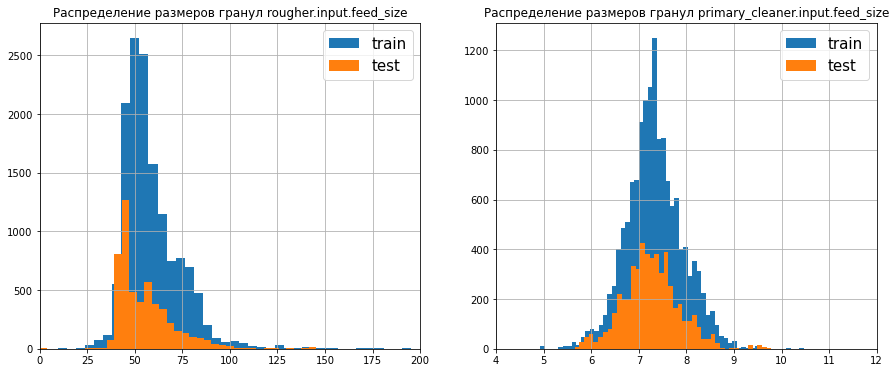

In [15]:
fig, ax = plt.subplots(1, 2)

for i, name in zip([0, 1], ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']):
    ax[i].hist(train[name], bins=100, label='train')
    ax[i].hist(test[name], bins=100, label='test')
    ax[i].legend(shadow = False, fontsize = 15)
    ax[i].grid()
    ax[i].set_title('Распределение размеров гранул ' + name, fontsize = 12)

ax[0].set_xlim([0, 200])
ax[1].set_xlim([4, 12])

fig.set_figwidth(15)
fig.set_figheight(6)

plt.show()

- Распределение размеров гранул перед флотацией `rougher.input.feed_size` для обучающей и тестовый выборок схожи. Границы (25 - 125), пики (35-50) и смещения влево практически совпадают. Сильные отличия только в количестве замеров.

- Распределение размеров гранул перед флотацией `primary_cleaner.input.feed_size` для обучающей и тестовый выборок схожи. Границы (5 - 11), пики (7-7.5) практически совпадают. Сильные отличия только в количестве замеров. 

### Cуммарная концентрация всех веществ на разных стадиях

In [16]:
concentration_table['total_concentration'] = concentration_table.loc[:, '_au':'_sol'].sum(axis=1)

concentration_table

,_au,_ag,_pb,_sol,total_concentration
сырье,8.125839,8.593574,3.528235,37.189485,57.437133
черновой концентрат,20.280214,12.098115,7.742580,29.833638,69.954547
1-я стадия,32.841295,8.507298,10.142270,10.238614,61.729478
финальный концентрат,45.011244,5.066039,10.102264,9.184826,69.364372


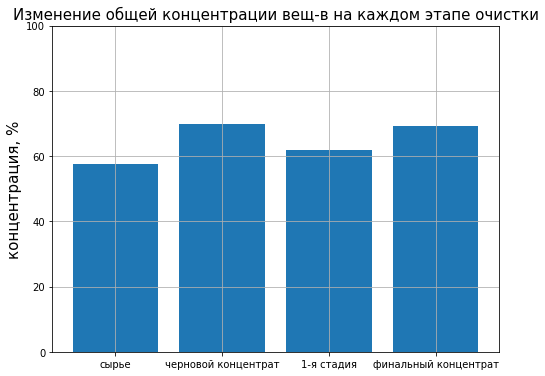

In [17]:
fig, ax = plt.subplots()

ax.bar(concentration_table.index, 
        concentration_table['total_concentration'],
        linestyle = '-')

fig.set_figwidth(8)
fig.set_figheight(6)

ax.set_title('Изменение общей концентрации вещ-в на каждом этапе очистки', fontsize = 15)
ax.grid()

ax.set_ylabel('концентрация, %', fontsize = 15)
ax.set_ylim([0, 100])

plt.show()

- Общая концентрация веществ меняется примерно на 10%, взависимости от стадии. Сырье и 1-я стади: 57-61%. Черновой концентрат и 2-я стадия: 69%

### Вывод

<b>
    
- На каждом этапе очистки медианная концентрация золота растёт (8% - 45%), концентрация серебра сначала растёт потом падает (8% - 5%), концентрация свинца растёт, а затем стабилизируется (3% - 10%).

    
- Распределение размеров гранул перед флотацией и 1-й стадией очистки для обучающей и тестовый выборок схожи. Границы , пики и смещения практически совпадают. Сильные отличия только в количестве значений.
 
    
- Общая концентрация веществ меняется примерно на 10%, взависимости от стадии.
      
</b>

## Модель

### Функция `sMAPE`

- Создадим необходимы функции для тестирования моделей

In [18]:
def output_sMAPE(target_valid, predicted_valid):
    
    """
    Функция возвращает значение метрики качества модели sMAPE,
    принимая на вход:
    
     - целевой признак target_valid, который состоит из 2 столбцов 
     'rougher.output.recovery' и 'final.output.recovery';
     
     - значение предсказания, которое состоит из 2 множеств, для 2 целевых признаков.
     
    """
    
        
    total_table = target_valid.reset_index(drop=True).join(pd.DataFrame(predicted_valid))
    rougher_smape = total_table.apply(lambda x: abs(x['rougher.output.recovery'] - x[0]) * 100 / 
                                      ((abs(x['rougher.output.recovery']) + abs(x[0]))/2), axis=1)
    final_smape = total_table.apply(lambda x: abs(x['final.output.recovery'] - x[1]) * 100 / 
                                      ((abs(x['final.output.recovery']) + abs(x[1]))/2), axis=1)
   
    return (0.25 * rougher_smape.mean() + 0.75 * final_smape.mean())

In [19]:
def cross_samle_sep(features, target, size, i):
    
    """
    Функция возвращает значения разделённой выбоки для конкретных
    индексов при использовании кросс-валидации.
    
    На вход принимает:
    
    - features таблицу признаков обучающей выбоки;
    
    - target таблицу целевых признаков обучающей выбоки;
    
    - size размер выборки для кросс-валидации;
    
    - i номер итерации.
    
    """
    
    valid_indexes = list(features[i:(sample_size + i)].index)
    train_indexes = list(features[0:i].index) + list(features[(sample_size + i):].index)
    
    features_train = features[features.index.isin(train_indexes)]
    target_train = target[features.index.isin(train_indexes)]
    
    features_valid = features[features.index.isin(valid_indexes)]
    target_valid = target[features.index.isin(valid_indexes)]
    
    return features_train, target_train, features_valid, target_valid

### Модель линейной регрессии

- Разобьем тренировочную выборку на целевые и нецелевые признаки

In [20]:
features = train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target = train[['rougher.output.recovery','final.output.recovery']]

- Применим кросс-валидацию к модели и оценим ее качество по метрике sMAPE.

In [21]:
scores = []
sample_size = int(len(train) / 10)

for i in range(0, len(train), sample_size):
    
    (features_train, 
     target_train, 
     features_valid, 
     target_valid) = (cross_samle_sep(features, target, sample_size, i))

    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    score = output_sMAPE(target_valid, predicted_valid)
    
    scores.append(score)

In [22]:
sMAPE_lin_regres = sum(scores) / len(scores)

sMAPE_lin_regres

5.751229079891939

### Модель логистической регрессии

In [23]:
scores = []

for i in range(0, len(train), sample_size):
     
    (features_train, 
     target_train, 
     features_valid, 
     target_valid) = (cross_samle_sep(features, target, sample_size, i))

    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    model= LogisticRegression(random_state=12345)

    model.fit(features_train, target_train['rougher.output.recovery'].astype(int))
    predicted_valid_rougher = model.predict(features_valid)

    model.fit(features_train, target_train['final.output.recovery'].astype(int))
    predicted_valid_final = model.predict(features_valid)

    predicted_valid = pd.DataFrame({0: predicted_valid_rougher, 1: predicted_valid_final})
    
    score = output_sMAPE(target_valid, predicted_valid)
    
    scores.append(score)

In [24]:
sum(scores) / len(scores)

7.134243119404444

### Модель градиентного спуска

- Проведём подбор оптимальных параметро для модели.

In [25]:
model = SGDRegressor(random_state=12345)
param_grid = {"tol": [.001, .003, .0001, .0003],
              "eta0": [.001, .003, .0001, .0003]}
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=2)
grid_search.fit(features, target['final.output.recovery'])
print(grid_search.best_params_)

{'eta0': 0.0001, 'tol': 0.001}


- По аналогии с предыдущей проверкой модели проведём кросс-валидацию.

In [26]:
scores = []

for i in range(0, len(train), sample_size):
    
    (features_train, 
     target_train, 
     features_valid, 
     target_valid) = (cross_samle_sep(features, target, sample_size, i))
    
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)

    model= SGDRegressor(tol=.001, eta0=.0001, random_state=12345)

    model.fit(features_train, target_train['rougher.output.recovery'])
    predicted_valid_rougher = model.predict(features_valid)

    model.fit(features_train, target_train['final.output.recovery'])
    predicted_valid_final = model.predict(features_valid)

    predicted_valid = pd.DataFrame({0: predicted_valid_rougher, 1: predicted_valid_final})
    
    score = output_sMAPE(target_valid, predicted_valid)
    
    scores.append(score)

In [27]:
sum(scores) / len(scores)

6.2977285618433685

### Модель случайного леса

- Проведём подбор оптимальных параметров для модели.

In [28]:
model = RandomForestRegressor(random_state=12345)
param_grid = {"n_estimators": [145, 147, 150, 152, 155],
              "max_depth": [12, 13, 14, 15]}
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=2)
grid_search.fit(features, target['final.output.recovery'])
print(grid_search.best_params_)

{'max_depth': 15, 'n_estimators': 155}


- По аналогии с предыдущей проверкой модели проведём кросс-валидацию.

In [35]:
scores = []

for i in range(0, len(train), sample_size):
     
    (features_train, 
     target_train, 
     features_valid, 
     target_valid) = (cross_samle_sep(features, target, sample_size, i))

    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    model= RandomForestRegressor(random_state=12345, n_estimators=155, max_depth=15)

    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    score = output_sMAPE(target_valid, predicted_valid)
    
    scores.append(score)

In [36]:
sum(scores) / len(scores)

2.861116212846403

### Проверка модели на тестовых данных

- Исходи из полученных значений метрики `sMAPE` для приведённых моделей, выберем лучшую.

In [38]:
train = full.loc[train.index].drop(['rougher.output.recovery', 
                                  'final.output.recovery', 
                                  'rougher.calculation.au_pb_ratio', 
                                  'rougher.calculation.floatbank10_sulfate_to_au_feed', 
                                  'rougher.calculation.floatbank11_sulfate_to_au_feed', 
                                  'rougher.calculation.sulfate_to_au_concentrate',], axis=1)

target_train = full.loc[train.index][['rougher.output.recovery', 
                                      'final.output.recovery']]

In [39]:
test = full.loc[test.index].drop(['rougher.output.recovery', 
                                  'final.output.recovery', 
                                  'rougher.calculation.au_pb_ratio', 
                                  'rougher.calculation.floatbank10_sulfate_to_au_feed', 
                                  'rougher.calculation.floatbank11_sulfate_to_au_feed', 
                                  'rougher.calculation.sulfate_to_au_concentrate',], axis=1)

target_test = full.loc[test.index][['rougher.output.recovery', 
                                  'final.output.recovery']]

In [40]:
model = RandomForestRegressor(random_state=12345, n_estimators=155, max_depth=15)
model.fit(train, target_train)
predicted_valid = model.predict(test)

output_sMAPE(target_test, predicted_valid)

2.6016574604039095

## Вывод

<b>
    
- Среднее значение отклонений  эффективности обогащения "чернового концентрата" по исходным данными и по формуле практически нулевое.

    
- В качестве индексов для все таблиц были установлены даты.
   
    
- Заполнение пропусков было осуществлено методом `ffill`, исходя из того, что cоседние по времени параметры часто похожи.
    
    
- На каждом этапе очистки медианная концентрация золота растёт (8% - 45%), концентрация серебра сначала растёт потом падает (8% - 5%), концентрация свинца растёт, а затем стабилизируется (3% - 10%).

    
- Распределение размеров гранул перед флотацией и 1-й стадией очистки для обучающей и тестовый выборок схожи. Границы , пики и смещения практически совпадают. Сильные отличия только в количестве значений.
 
    
- Общая концентрация веществ меняется примерно на 10%, взависимости от стадии.
    
    
- Было обучены и проверены кросс-валидацией следующие модели: `LinearRegression`, `LogisticRegression`, `SGDRegressor`, `RandomForestRegressor`.
  
    
- На основание метрики качества `sMAPE` была выбрана модель `LinearRegression` и проверена на тестовых данных. Качество модели осталось на прежнем уровне - 5.7%.
    
</b>